# 1. Импорт нужных библиотек и открытие датасетов

In [44]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [45]:
Dataframe1 = pd.read_csv('C:/Users/fursa/Downloads/archive/Orders.csv')
Dataframe2 = pd.read_csv('C:/Users/fursa/Downloads/archive/Details.csv')

# 2. Описание датасетов

Перед нами два датасета универсального интернет-магазина в Индии, содержащие информацию о деятельности этого магазина за 1 год. Первый датасет содержит общую информацию о заказе и покупателе. Второй датасет содержит более детальную информацию о каждом заказе. Подготовим имеющиеся данные для дальнейшего анализа и объединим их в один датасет для большего удобства.

In [46]:
Dataframe1

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore
...,...,...,...,...,...
495,B-25742,03-08-2018,Ashwin,Goa,Goa
496,B-26088,26-03-2018,Bhavna,Sikkim,Gangtok
497,B-25707,01-07-2018,Shivani,Maharashtra,Mumbai
498,B-25758,22-08-2018,Shubham,Himachal Pradesh,Simla


In [47]:
Dataframe2

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...,...
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD


Количество строк в первом и втором датасете значительно отличается. Попробуем узнать, с чем это связано.

In [48]:
Dataframe2.nunique ()

Order ID        500
Amount          590
Profit          406
Quantity         14
Category          3
Sub-Category     17
PaymentMode       5
dtype: int64

Количество уникальных значений в поле Order Id равно 500.
Во втором датафреме 1500 строк, когда как в первом 500. Такая разница наблюдается ввиду того, что если заказ состоит из раных подкатегорий, то создаются новые строки дублирующие один и тот же Order Id.
Таким образом, можно провести слияние двух датафреймов в один используя pd.merge(). Тк Order ID (ключ) в обеих фреймах одинаковый.

In [49]:
DF = pd.merge(Dataframe1, Dataframe2, on="Order ID")
DF

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD
...,...,...,...,...,...,...,...,...,...,...,...
1495,B-25742,03-08-2018,Ashwin,Goa,Goa,11,-8,2,Clothing,Skirt,UPI
1496,B-26088,26-03-2018,Bhavna,Sikkim,Gangtok,11,5,2,Clothing,Hankerchief,UPI
1497,B-25707,01-07-2018,Shivani,Maharashtra,Mumbai,8,-6,1,Clothing,Stole,COD
1498,B-25758,22-08-2018,Shubham,Himachal Pradesh,Simla,8,-2,1,Clothing,Stole,COD


Теперь после объединения двух датафреймов можно проверить, сколько в каждом столбце null и NaN значений.


In [50]:
DF.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [51]:
DF.isna().sum() 

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

Для дальнейшего анализа добавим два поля в наш фрейм: Себестоимость проданного товара и процент прибыли

In [52]:
DF = DF.assign(cost_price = DF['Amount'] - DF['Profit'])


In [53]:
DF = DF.assign(percentage_of_profit = (DF['Profit'] * 100) / DF['cost_price'])
DF


,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,cost_price,percentage_of_profit
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI,5665,1.129744
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card,557,20.466786
2,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD,432,2.546296
3,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI,50,14.000000
4,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD,179,26.815642
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-25742,03-08-2018,Ashwin,Goa,Goa,11,-8,2,Clothing,Skirt,UPI,19,-42.105263
1496,B-26088,26-03-2018,Bhavna,Sikkim,Gangtok,11,5,2,Clothing,Hankerchief,UPI,6,83.333333
1497,B-25707,01-07-2018,Shivani,Maharashtra,Mumbai,8,-6,1,Clothing,Stole,COD,14,-42.857143
1498,B-25758,22-08-2018,Shubham,Himachal Pradesh,Simla,8,-2,1,Clothing,Stole,COD,10,-20.000000


Далее необходимо изменить формат данных в поле Дата с object на datatime, а также отфильтровать фрейм по этому полю.

In [11]:
DF['Order Date'] = pd.to_datetime(DF['Order Date'], format='%d-%m-%Y')
print(DF.dtypes)

Order ID                        object
Order Date              datetime64[ns]
CustomerName                    object
State                           object
City                            object
Amount                           int64
Profit                           int64
Quantity                         int64
Category                        object
Sub-Category                    object
PaymentMode                     object
cost_price                       int64
percentage_of_profit           float64
dtype: object


In [12]:
DF = DF.sort_values(by = 'Order Date')
DF

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,cost_price,percentage_of_profit
1311,B-25928,2018-01-01,Smriti,Bihar,Patna,122,15,3,Electronics,Accessories,EMI,107,14.018692
1312,B-25928,2018-01-01,Smriti,Bihar,Patna,25,10,1,Furniture,Furnishings,UPI,15,66.666667
295,B-25929,2018-01-02,Girase,Kerala,Thiruvananthapuram,1308,536,3,Furniture,Bookcases,Credit Card,772,69.430052
296,B-25929,2018-01-02,Girase,Kerala,Thiruvananthapuram,216,-135,3,Furniture,Chairs,Credit Card,351,-38.461538
297,B-25929,2018-01-02,Girase,Kerala,Thiruvananthapuram,154,-85,3,Furniture,Chairs,EMI,239,-35.564854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,B-25925,2018-12-29,Shruti,Maharashtra,Mumbai,27,12,1,Clothing,Stole,Debit Card,15,80.000000
332,B-25925,2018-12-29,Shruti,Maharashtra,Mumbai,1228,14,3,Furniture,Chairs,UPI,1214,1.153213
331,B-25925,2018-12-29,Shruti,Maharashtra,Mumbai,314,-41,3,Electronics,Electronic Games,Credit Card,355,-11.549296
1419,B-25926,2018-12-30,Dipali,Madhya Pradesh,Indore,57,6,5,Clothing,Leggings,Debit Card,51,11.764706


 Переименуем название полей.

In [56]:
DF.rename(columns = {'Order ID': 'Order_ID', 'Order Date' : 'Order_Date', 'Sub-Category' : 'Sub_Category'}, inplace = True)
DF

,Order_ID,Order_Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub_Category,PaymentMode,cost_price,percentage_of_profit
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI,5665,1.129744
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card,557,20.466786
2,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD,432,2.546296
3,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI,50,14.000000
4,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD,179,26.815642
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-25742,03-08-2018,Ashwin,Goa,Goa,11,-8,2,Clothing,Skirt,UPI,19,-42.105263
1496,B-26088,26-03-2018,Bhavna,Sikkim,Gangtok,11,5,2,Clothing,Hankerchief,UPI,6,83.333333
1497,B-25707,01-07-2018,Shivani,Maharashtra,Mumbai,8,-6,1,Clothing,Stole,COD,14,-42.857143
1498,B-25758,22-08-2018,Shubham,Himachal Pradesh,Simla,8,-2,1,Clothing,Stole,COD,10,-20.000000


Описание итогового датасета:

Order_ID - номер заказа

Order_Date - дата заказа

CustomerName - имя покупателя

State - штат покупателя

City - город покупателя

Amount - сумма заказа

Profit - прибыль 	

Quantity - кол-во позиций в заказе

Category - категория товара

Sub_Category - подкатегория товара

PaymentMode	- способ оплаты

cost_price - себестоимость

percentage_of_profit - процент прибыли 

# 3. Определение общего вектора анализа и постановка задач

Перед нами информация о заказах за год в небольшом интернет-магазине, продающем товары абсолютно разного назначения. 
Задачи:
1. Рассчитать долю каждой категории в общей прибыли за год. 
2. Определить наиболее часто встречающуюся сумму заказа в каждой категории товаров.
3. Рассчитать прибыльность различных подкатегороий.
4. Рассчитать процент прибыли по подкатегориям (отношение чистой прибыи к затратам).
5. Определить соотношение популярности товара и его цены.
6. Рассчитать кол-во уникальных покупателей за год.
7. Расчитать процент постоянных покупателей.
8. Найти самый прибыльный месяц.
9. Определить, есть ли цикличность в уровне продаж.



# 4. Анализ

Во время выполнения задачи №3 была найдена ошибка в данных, попущенная при заполнении таблицы. Исправим эту ошибку уже сейчас для корректности дальнейших рассчетов.

In [14]:
DF.groupby('Sub_Category').agg({'percentage_of_profit': 'mean'}).sort_values(by = 'percentage_of_profit', ascending  = [False])

,percentage_of_profit
Sub_Category,
Printers,32.486146
T-shirt,27.612686
Stole,25.091758
Hankerchief,24.789365
Bookcases,24.406729
Shirt,19.492526
Accessories,19.001251
Trousers,16.450299
Phones,8.728275


Мы видим, что процент прибыли по саб категории Saree не расчитался, это может связано с тем, что в знаменателе формулы значится 0.

In [15]:
DF.query('Sub_Category == ["Saree"]').query('cost_price == 0')

,Order_ID,Order_Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub_Category,PaymentMode,cost_price,percentage_of_profit
948,B-25933,2018-01-04,Shikhar,Maharashtra,Mumbai,412,412,6,Clothing,Saree,COD,0,inf


Действительно, согласно имеющимся данным себестоимость одного закза Saree равна 0. Скорее всего при внесении данных произошла ошибка. В связи с тем, что отсутсвует возможность узнать корректную информацию о себестоимости данного заказа, имеет смысл не использовать его в дальнейших расчетах, связанных с ценой заказа.

In [16]:
DF1 = DF.drop(index = 948)

Построим круговую диаграмму, показывающую процент дохода по Category.

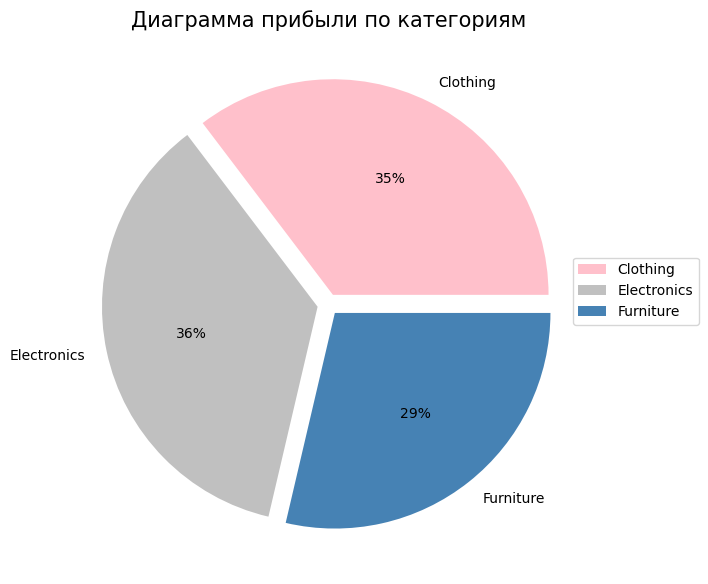

In [17]:
Pie = DF1.groupby('Category').agg({'Profit': 'sum' })
colors = ['pink', 'silver', 'steelblue'] 
Pie.plot.pie(y = 'Profit', figsize = (7,7),  autopct ='%1.0f%%', colors = colors, explode = (0.05, 0.05, 0.05) )
plt.ylabel(' ')
plt.title('Диаграмма прибыли по категориям', fontsize = 15)
plt.legend(
    bbox_to_anchor = (0.95, 0.1, 0.25, 0.5),
    loc = 'best' )
plt.show()

Видно, что все категории товаров приносят примерно одинаковое кол-во чистой прибыли. Однако, каждая категория делится на несколько подкатегорий, с которыми может складываться другая картина.


Определим, на какую сумму чаще всего заказывают товары в различных категориях.

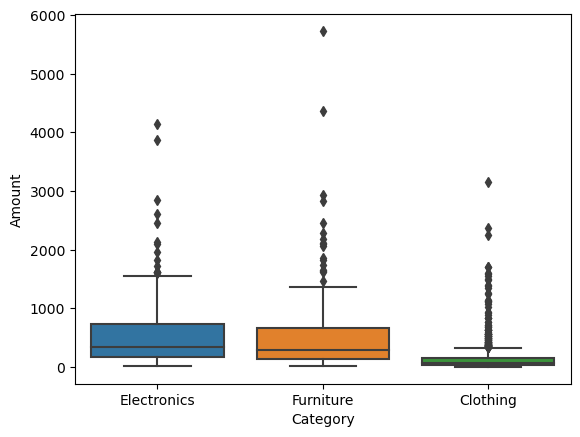

In [18]:
ax = sns.boxplot(x="Category", y="Amount", data=DF) 
plt.show()
plt.clf()
plt.close()

На графике видно, что в 50% случаев сумма заказа в категориях Электроники  и Мебели составляет до 1000 у.е. Показатели категории "Одежда" значительно отличаются от двух других - тут наиболее часто встречающаяся сумма заказа очень маленькая. При этом можно отметить, что нами был правильно сделан выбор в пользу построения Box-plot вместо расчета средней суммы заказа, т.к. наблюдается большое кол-во выбросов.

Исходя и полученных данных можно сделать вывод, что данный интернет-магазин чаще всего используется покупателями для совершения небольших покупок.

Теперь узнаем, сколько прибыли принесал каждая подкатегория за год.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Furnishings'),
  Text(1, 0, 'Electronic Games'),
  Text(2, 0, 'Kurti'),
  Text(3, 0, 'Skirt'),
  Text(4, 0, 'Leggings'),
  Text(5, 0, 'T-shirt'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Chairs'),
  Text(8, 0, 'Hankerchief'),
  Text(9, 0, 'Phones'),
  Text(10, 0, 'Stole'),
  Text(11, 0, 'Trousers'),
  Text(12, 0, 'Tables'),
  Text(13, 0, 'Accessories'),
  Text(14, 0, 'Saree'),
  Text(15, 0, 'Bookcases'),
  Text(16, 0, 'Printers')])

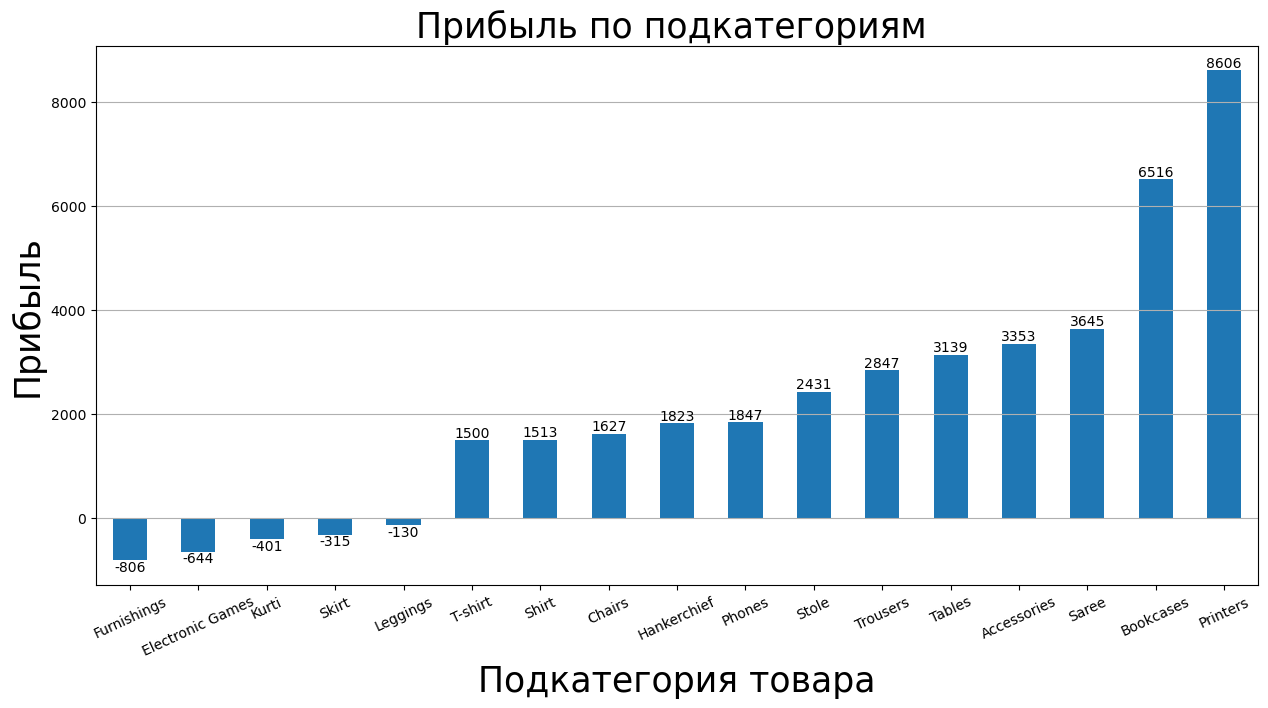

In [19]:
hist1 = DF1.groupby('Sub_Category').agg({'Profit': 'sum'}).sort_values(by = 'Profit', ascending  = [True])
a = hist1.plot(kind = 'bar', figsize = (15,7), legend = False)
a.bar_label (a.containers [ 0 ])
plt.title('Прибыль по подкатегориям ', fontsize = 25)
plt.ylabel('Прибыль', fontsize = 25)
plt.xlabel('Подкатегория товара', fontsize = 25)
plt.grid(axis = 'y')
plt.xticks(rotation = 25)

Видно, что 5 подкатегорий товаров принесли убыток: то есть затраты на закупку\производство этих товаров превышают доходность от них же. Эту проблем можно решить :
- путем повышения цены на соответствующие позиции;
- уменьшением завтрат на закупку\производство;
- исключением соответствующих позиций из ассортимента вовсе.
Стоит помнить, что мы имеем данные по подкатегориям товаров, а не по отдельным товарам.

Еще одним полезным показателем в розничной торговли является процент прибыльности (отношение чистой прибыли к затратам). Рассчитаем данный показатель для каждой подкатегории.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Skirt'),
  Text(1, 0, 'Kurti'),
  Text(2, 0, 'Leggings'),
  Text(3, 0, 'Furnishings'),
  Text(4, 0, 'Electronic Games'),
  Text(5, 0, 'Phones'),
  Text(6, 0, 'Chairs'),
  Text(7, 0, 'Saree'),
  Text(8, 0, 'Trousers'),
  Text(9, 0, 'Bookcases'),
  Text(10, 0, 'Hankerchief'),
  Text(11, 0, 'Stole'),
  Text(12, 0, 'Tables'),
  Text(13, 0, 'Printers'),
  Text(14, 0, 'Accessories'),
  Text(15, 0, 'Shirt'),
  Text(16, 0, 'T-shirt')])

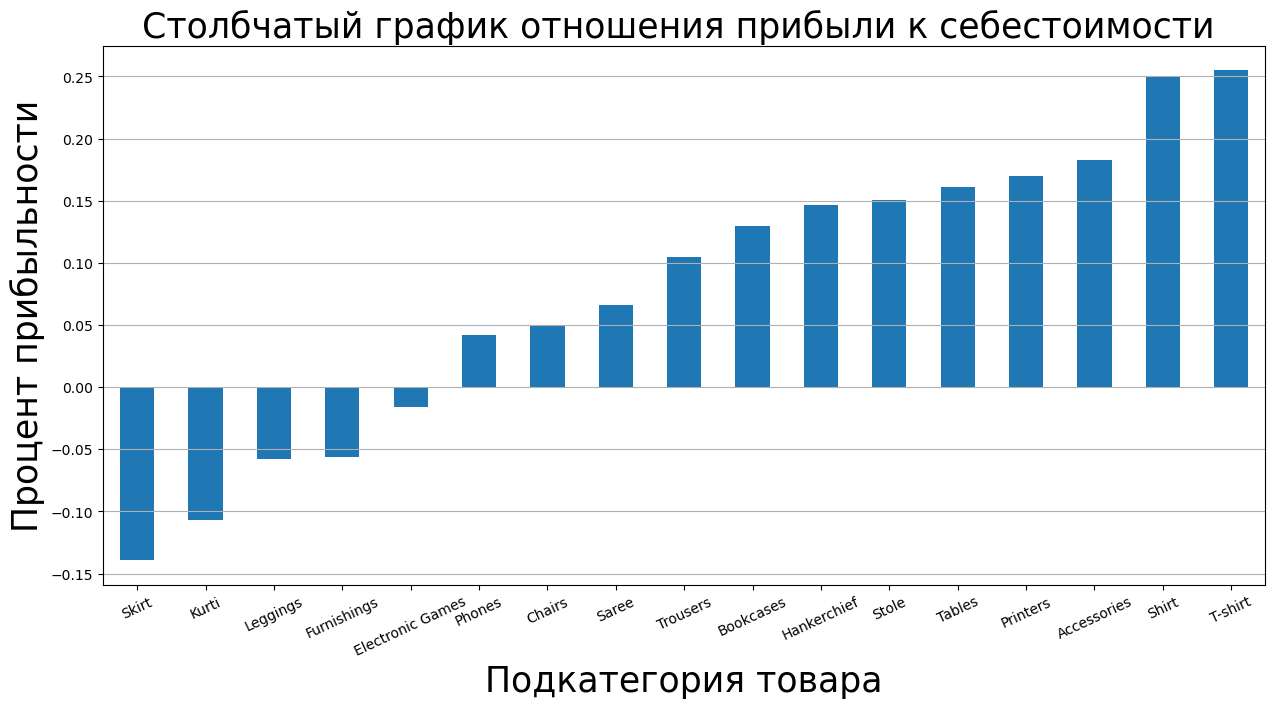

In [20]:
hist2=DF1.groupby('Sub_Category').agg({'cost_price': 'sum'})
hist2['percentage_of_profit'] = hist1.Profit/hist2.cost_price
hist2 = hist2.drop('cost_price', axis = 1).sort_values(by = 'percentage_of_profit', ascending  = [True])
b = hist2.plot(kind = 'bar', figsize = (15,7), legend = False)
b.bar_label (a.containers [ 0 ])
plt.title('Столбчатый график отношения прибыли к себестоимости ', fontsize = 25)
plt.ylabel('Процент прибыльности', fontsize = 25)
plt.xlabel('Подкатегория товара', fontsize = 25)
plt.grid(axis = 'y')
plt.xticks(rotation = 25)

При анализе двух последних графиков в совокупности можно заменить интересный факт: товары с наибольшим процентов прибыльности (Рубашки и Футболки) принесли наименьшую прибыль магазину за год. Это говорит о том, что количество заказов товаров этих подкатегорий низкое. В такой ситуации можно посоветовать администрации магазина сделть упор на повышение продаж самых выгодных для них подкатегорий товаров.

Далее подробнее остановимся на уровне продаж по подкатегориям товаров и соотношение этого показателя с ценой.

In [21]:
#кол-во проданного товара на каждую подкатегорию
QU = DF1.groupby('Sub_Category').agg({'Quantity': 'sum'}).sort_values(by = 'Sub_Category', ascending  = [True]) 
#сумма проданного товара на каждую подкатегорию
AM = DF1.groupby('Sub_Category').agg({'Amount': 'sum'}).sort_values(by = 'Sub_Category', ascending  = [True])
#средняя цена одной единицы товара на каждую подкатегорию
aaa=list(AM.Amount/QU.Quantity) 

QU.insert(1, 'Price', aaa)
QU.sort_values(by = 'Price', ascending  = [True])

,Quantity,Price
Sub_Category,,
Skirt,248,7.846774
Leggings,186,11.322581
Hankerchief,741,19.290148
Kurti,164,20.493902
T-shirt,305,24.203279
Stole,671,27.639344
Shirt,271,27.878229
Furnishings,310,43.496774
Saree,789,74.375158


Text(0.5, 0, 'Цена')

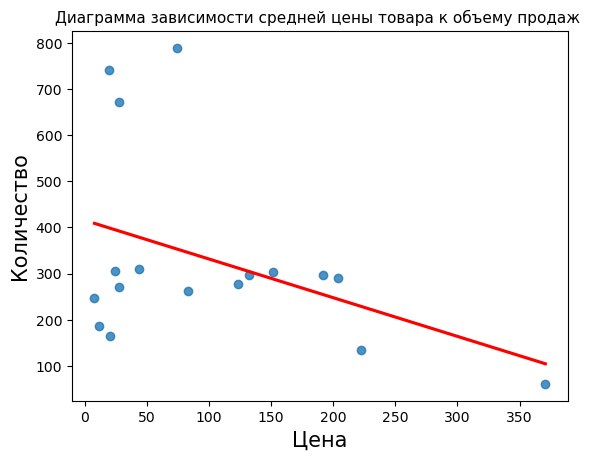

In [22]:
sns.regplot(x=QU.Price, y=QU.Quantity, ci=False, line_kws={'color':'red'})
plt.title('Диаграмма зависимости средней цены товара к объему продаж ', fontsize = 11)
plt.ylabel('Количество', fontsize = 15)
plt.xlabel('Цена', fontsize = 15)

Исходя из произхведенных рассчетов можно сделать следующие выводы:
1. 3 наиболее популярных товара находятся в нижнем ценовом сегменте.
2. Наименее популярный тоавар является одновременно самым дорогим в ассортимете.
3. Линия тренда показывает обратную корреляцию между ценой товара и количеством его заказов.


Далее перейдем к анализу покупателей данного магазина. Сколько их всего? Есть ли постоянные?
Для начала найдем количество уникальных покупателей.

In [23]:
DF.CustomerName.nunique()

336

Ввиду того, что количество уникальных пользователей равно 336, а всего заказов 500, будем считать постоянным покупателем пользователя с двумя и более заказами.

In [24]:
names = Dataframe1.value_counts('CustomerName')

In [25]:
names.value_counts(normalize = True)

count
1    0.681548
2    0.184524
3    0.107143
4    0.020833
6    0.002976
5    0.002976
Name: proportion, dtype: float64

Таким образом, только 32 процента пользователей являются постоянными клиентами.

Попробуем найти какую-либо зависимость связанную с обмъемом продаж по месяцам. Для этого создадим два новых поля: порядковый номер месяца и порядковый номер дня в месяце.

In [26]:
DF1["month"] = pd.to_datetime(DF["Order_Date"]).dt.month
DF1["day"] = pd.to_datetime(DF["Order_Date"]).dt.day
DF1.tail()

,Order_ID,Order_Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub_Category,PaymentMode,cost_price,percentage_of_profit,month,day
330,B-25925,2018-12-29,Shruti,Maharashtra,Mumbai,27,12,1,Clothing,Stole,Debit Card,15,80.000000,12,29
332,B-25925,2018-12-29,Shruti,Maharashtra,Mumbai,1228,14,3,Furniture,Chairs,UPI,1214,1.153213,12,29
331,B-25925,2018-12-29,Shruti,Maharashtra,Mumbai,314,-41,3,Electronics,Electronic Games,Credit Card,355,-11.549296,12,29
1419,B-25926,2018-12-30,Dipali,Madhya Pradesh,Indore,57,6,5,Clothing,Leggings,Debit Card,51,11.764706,12,30
1171,B-25927,2018-12-31,Shreya,Uttar Pradesh,Lucknow,200,7,4,Electronics,Electronic Games,Credit Card,193,3.626943,12,31


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

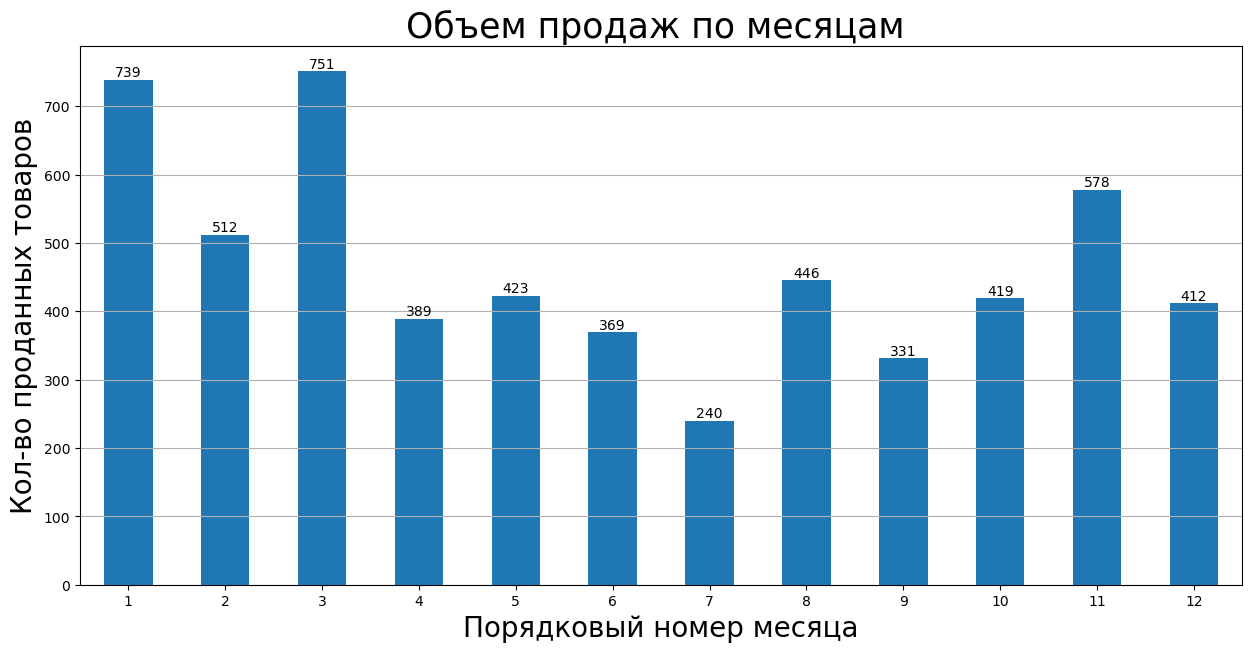

In [27]:
month = DF1.groupby('month').agg({'Quantity': 'sum' })
b = month.plot(kind = 'bar', figsize = (15,7), legend = False)
b.bar_label (b.containers [ 0 ])
plt.title('Объем продаж по месяцам ', fontsize = 25)
plt.ylabel('Кол-во проданных товаров', fontsize = 20)
plt.xlabel('Порядковый номер месяца', fontsize = 20)
plt.grid(axis = 'y')
plt.xticks(rotation = 0)

Text(0.5, 80.7222222222222, 'Номер месяца')

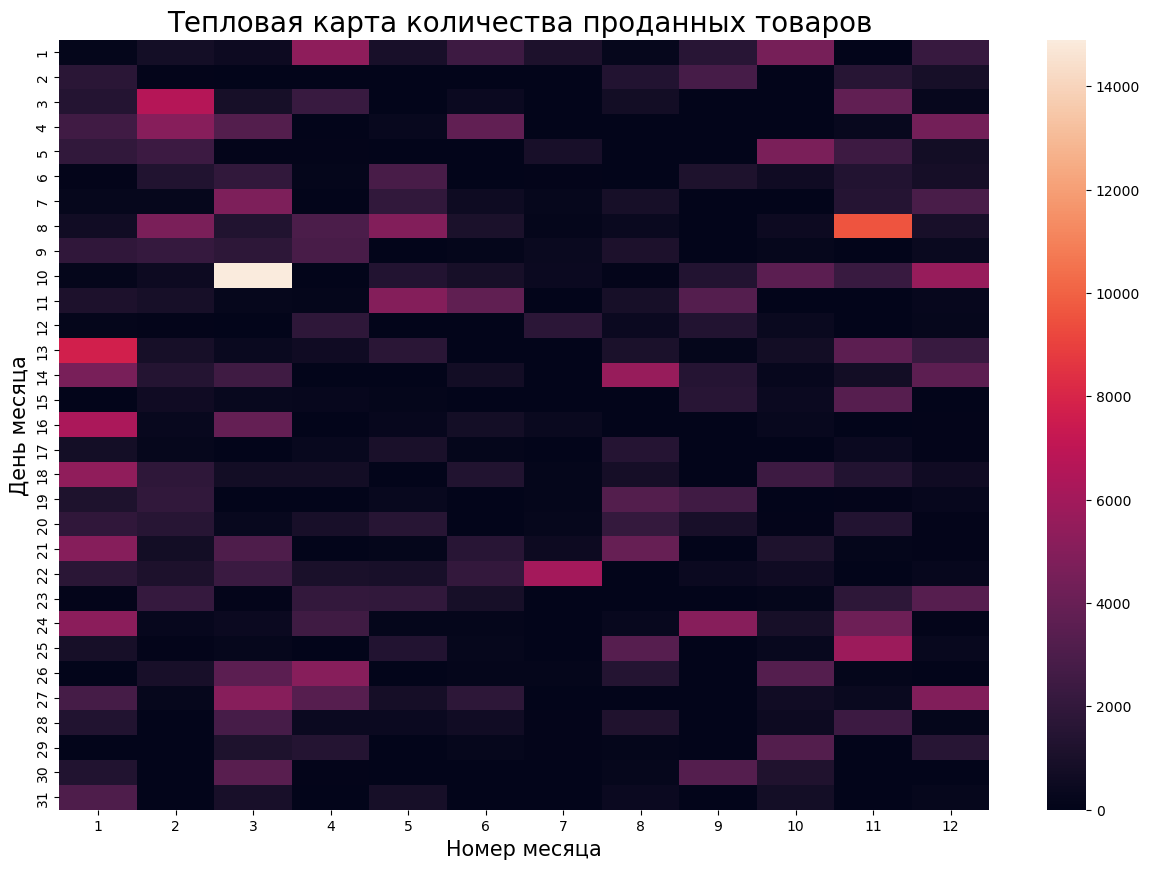

In [28]:
heat = pd.pivot_table(DF1, values = 'Amount', index = 'day', columns = 'month', aggfunc = 'sum' )
heat = heat.fillna(0) 
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(heat)
plt.title('Тепловая карта количества проданных товаров ', fontsize = 20)
plt.ylabel('День месяца', fontsize = 15)
plt.xlabel('Номер месяца', fontsize = 15)

Последние два графика были созданы с целью обнаружить зависимость объема продаж от наиболее популярных праздников в Индии, а также для обнаружения цикличности продаж в зависимости от части месяца. Однако ни того, ни дргуого обнаружено не было.